# Latent Consistency Models with ONNX and OpenVINO Execution Provider

Install required packages

In [1]:
%pip install -q "onnx==1.16.0"
%pip install -q "optimum==1.19.1" "optimum-intel==1.16.1" "diffusers==0.27.2" --extra-index-url https://download.pytorch.org/whl/cpu


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#Download the model locally
!optimum-cli export onnx --model SimianLuo/LCM_Dreamshaper_v7 lcm_onnx\

Framework not specified. Using pt to export the model.
Keyword arguments {'subfolder': '', 'use_auth_token': None, 'trust_remote_code': False} are not expected by StableDiffusionPipeline and will be ignored.

Loading pipeline components...: 100%|##########| 7/7 [00:00<00:00,  9.13it/s]
The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
Automatic task detection to stable-diffusion.

***** Exporting submodel 1/4: CLIPTextModel *****
Using framework PyTorch: 2.3.0+cpu
C:\AIPC\openvino_env\lib\site-packages\transformers\modeling_attn_mask_utils.py:86: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if input_shape[-1] > 1 or self.sliding_window is not None:
C:\AIPC\openvino_env\

In [2]:
from optimum.onnxruntime import ORTLatentConsistencyModelPipeline

#Define the ORTLatentConsistencyModelPipeline
pipeline = ORTLatentConsistencyModelPipeline.from_pretrained("SimianLuo/LCM_Dreamshaper_v7", 
	provider="OpenVINOExecutionProvider", #Define OpenVINO as the Execution Provider
    provider_options={'device_type' : 'GPU.0', #Run LCM on the AI PC's built-in GPU.
	'cache_dir' : './temp/'})

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

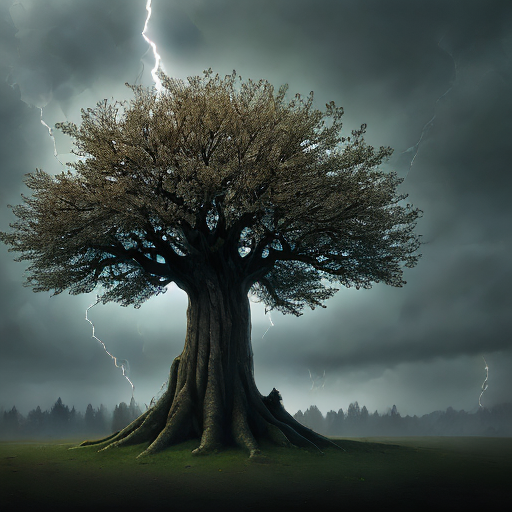

In [3]:
prompt = "tree with lightning in the background, 8k"
#Running LCM (FP16 Precision) on the Arc iGPU of an Intel Core Ultra
images = pipeline(prompt, num_inference_steps=4, guidance_scale=8.0, height=512, width=512).images[0]
images